## **충돌확률 계산 결과 정규성 검증**

## **import**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import jarque_bera,kstest
from scipy.stats import skew, kurtosis

## **충돌확률 ratio 시각화 (히스토그램)**

(0.001, 1000.0)

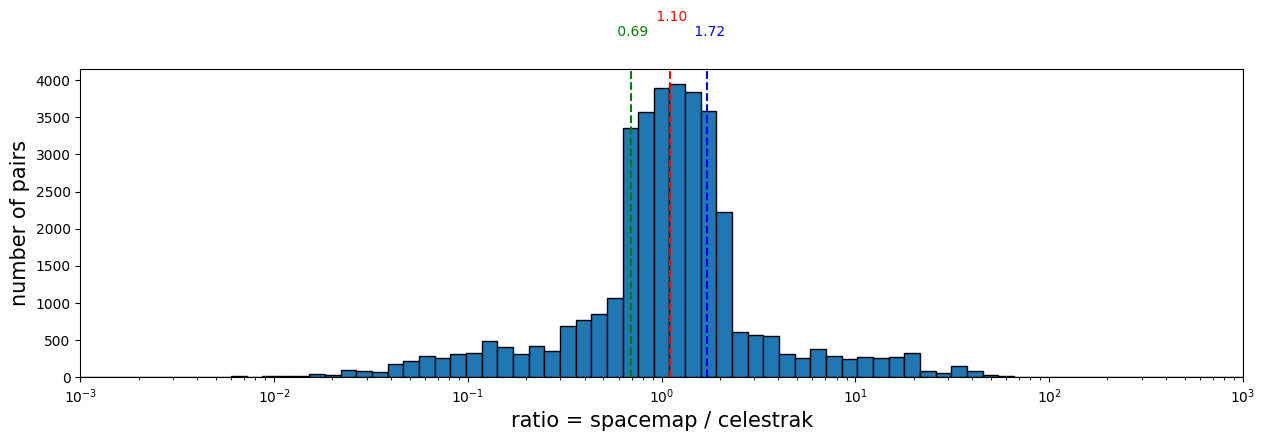

In [3]:
data_hist = pd.read_csv('../conjunction_assesement_result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h.csv')
data_hist= data_hist['ERROR(RATIO)'][1::2] # spacemap category만 저장

median, q1,q3= np.median(data_hist), np.percentile(data_hist, 25),np.percentile(data_hist, 75)
log_bins = np.logspace(np.log10(1e-04), np.log10(1e04), 100)

plt.figure(figsize=(15,4))
plt.hist(data_hist, bins=log_bins, range= (-1000,1000), edgecolor='k')
plt.axvline(median, color='r', linestyle='--', label='Median')
plt.axvline(q1, color='g', linestyle='--', label='Q1')
plt.axvline(q3, color='b', linestyle='--', label='Q3')
plt.text(median, 4800, f' {median:.2f}', color='r', ha='center')
plt.text(q1, 4600, f' {q1:.2f}', color='g',ha='center')
plt.text(q3, 4600, f' {q3:.2f}', color='b', ha='center')
plt.ylabel(ylabel="number of pairs",fontsize=15)
plt.xlabel(xlabel="ratio = spacemap / celestrak",fontsize=15)
plt.xscale('log',base=10)
plt.xlim(1e-03,1e03)

## **정규성 검증**

귀무가설 : ERROR(RATIO)의 분포가 정규분포를 따른다.<br/>
Test : Kolmogorov-Smirnov test & Jarque–Bera test

In [4]:
#Kolmogorov-Smirnov test
KS_test = kstest(data_hist,'norm')
KS_statistic, KS_pvalue= KS_test
KS_pvalue = round(KS_pvalue, 10)
print('Kolmogorov-Smirnov test')
print(f'검정 통계치 : {KS_statistic}')
print(f'pvalue : {KS_pvalue}\n')

#Jarque–Bera test
jb_test = jarque_bera(data_hist)
jb_statistic, jb_pvalue= jb_test
jb_pvalue = round(jb_pvalue,10)
print('Jarque–Bera test')
print(f'검정 통계치 : {jb_statistic}')
print(f'pvalue : {jb_pvalue}\n')

# 왜도
a=skew(data_hist)
# 첨도
b= kurtosis(data_hist, fisher=True)
print(f'왜도: {a}, 첨도: {b}')

Kolmogorov-Smirnov test
검정 통계치 : 0.5371549096861824
pvalue : 0.0

Jarque–Bera test
검정 통계치 : 12306798.467205685
pvalue : 0.0

왜도: 7.561268955551767, 첨도: 88.67984814603517
